In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [12]:
skin_df = pd.read_csv('C:/Users/Anmol/Desktop/UGP [4]/Skin_Cancer_dataset/HAM10000_metadata.csv')

In [13]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [14]:
import shutil

In [21]:
data_dir = os.getcwd() + "/Skin_Cancer_dataset/all_Image/"
dest_dir = os.getcwd() + "/Skin_Cancer_dataset/reorganized/"

In [22]:
dest_dir

'C:\\Users\\Anmol\\Desktop\\UGP [4]/Skin_Cancer_dataset/reorganized/'

In [23]:
data_dir

'C:\\Users\\Anmol\\Desktop\\UGP [4]/Skin_Cancer_dataset/all_Image/'

In [24]:
print(skin_df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [25]:
label=skin_df['dx'].unique().tolist()  #Extract labels into a list
label_images = []

In [26]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df[skin_df['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]  

In [27]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [28]:
datagen = ImageDataGenerator()

In [30]:
train_dir = os.getcwd() + "/Skin_Cancer_dataset/reorganized/"
train_dir

'C:\\Users\\Anmol\\Desktop\\UGP [4]/Skin_Cancer_dataset/reorganized/'

In [31]:
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


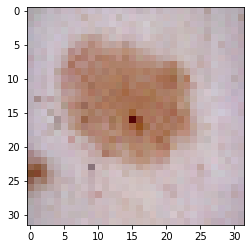

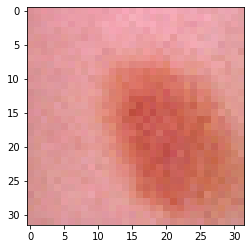

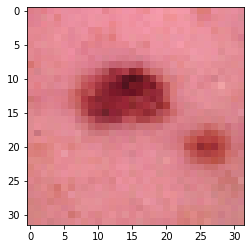

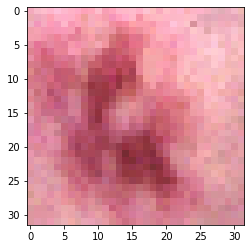

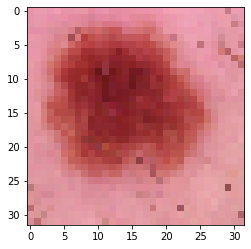

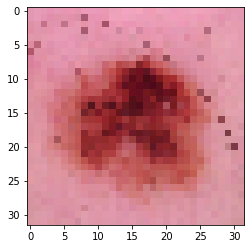

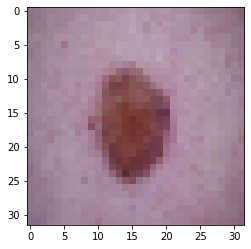

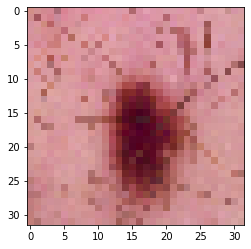

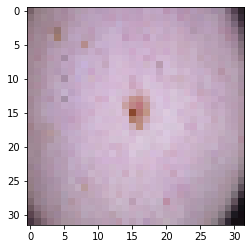

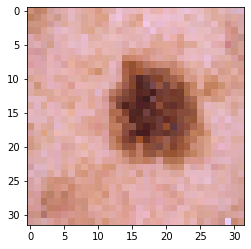

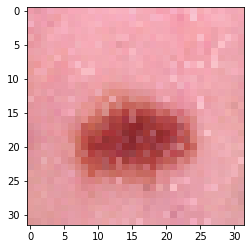

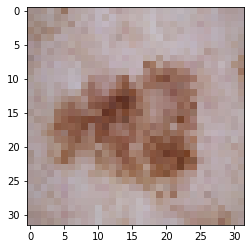

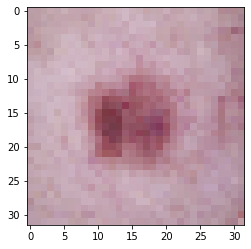

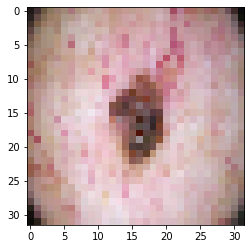

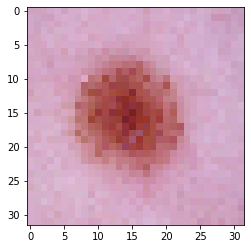

In [38]:
x, y = next(train_data_keras)
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()
